# Bismillahir Rahmanir Rahim
We are trying to analysis titanic dataset.After completing analysis we have to try making some prediction.
## Dataset Description:
We all most everyone know about the titanic tragedy.We now analyze the titanic dataset & trying to find some pattern from the dataset. 
The Titanic data containsa mix of textual, Boolean, continuous, and categorical variables. It exhibits interesting characteristics such as missing values, outliers, and text variables ripe for text mining–a rich database that will allow us to demonstrate data transformations.
Here’s a brief summary of the attributes:
- pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target
- name: A field rich in information as it contains title and family names
- sex: male/female
- age: Age, asignificant portion of values aremissing
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number.
- fare: Passenger fare (British Pound).
- cabin: Doesthe location of the cabin influence chances of survival?
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat, many missing values
- home.dest: Home/destination
- Referrence:

  https://hub.packtpub.com/introduction-titanic-datasets/
## Loading Libaries & Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
train=pd.read_csv("titanic.csv")
test=pd.read_csv("test.csv")
titanic=pd.concat([train,test])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       415 non-null    float64
 13  Name_wiki    415 non-null    object 
 14  Age_wiki     415 non-null    float64
 15  Hometown     415 non-null    object 
 16  Boarded      415 non-null    object 
 17  Destination  415 non-null    object 
 18  Lifeboat     157 non-null    object 
 19  Body   

In [4]:
titanic["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

We have to remove unnessary column which is less releted to survival column.We have to remove below column:
- 'WikiId', 'Name_wiki','Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body','Class''Ticket', 'Fare'

In [5]:
titanic=titanic.drop(['WikiId', 'Name_wiki','Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body','Class','Ticket','Cabin'],axis=1)

Now we have try to remove duplicate entries.

In [6]:
titanic.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [7]:
titanic.shape

(1309, 10)

In [8]:
titanic.astype(str).apply(lambda x: x.str.lower())
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

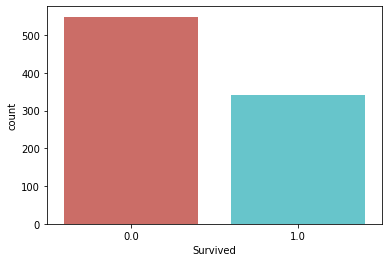

In [9]:
sn.countplot(x='Survived',data=titanic,palette ='hls')

# Relation between different columns with Survived columns
We see that number of survival people is less.There was several condition behind the reason.We try to demonstrate the reason by analysing data.
Now we try to find some relation between various columns with survival columns.
- Sex - Survived
- Age - Survived
- Pclass - Survived
- Parch - Survived

In [10]:
titanic[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


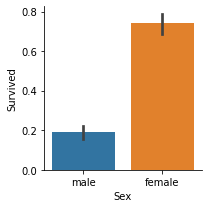

In [11]:
g = sn.factorplot(x="Sex", y ="Survived", data=titanic, kind="bar", size=3)
plt.show()

We see that female are most likely survive than male.

## Age - Survived 

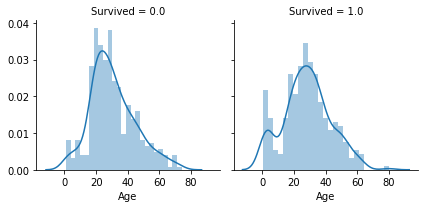

In [12]:
g = sn.FacetGrid(titanic, col="Survived")
g.map(sn.distplot, "Age", bins=25)
plt.show()


## Pclass - Survived

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


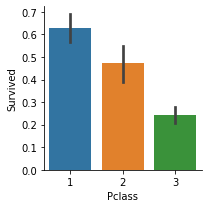

In [13]:
g = sn.factorplot(x="Pclass", y ="Survived", data=titanic, kind="bar", size=3)
plt.show()

## Embarked - Survived

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


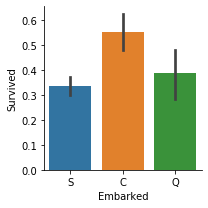

In [14]:
g = sn.factorplot(x="Embarked", y ="Survived", data=titanic, kind="bar", size=3)
plt.show()


## Sibsp -Survived

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


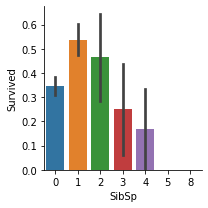

In [15]:
g = sn.factorplot(x="SibSp", y ="Survived", data=titanic, kind="bar", size=3)
plt.show()

## Parch - Survived

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


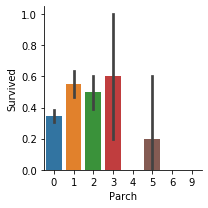

In [16]:
g = sn.factorplot(x="Parch", y ="Survived", data=titanic, kind="bar", size=3)
plt.show()

Reference:

https://www.kaggle.com/hasanburakavci/my-titanic-project

# working with missing data
We are now try to work with missing data.

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [18]:
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028380F35488>,
      dtype=object)

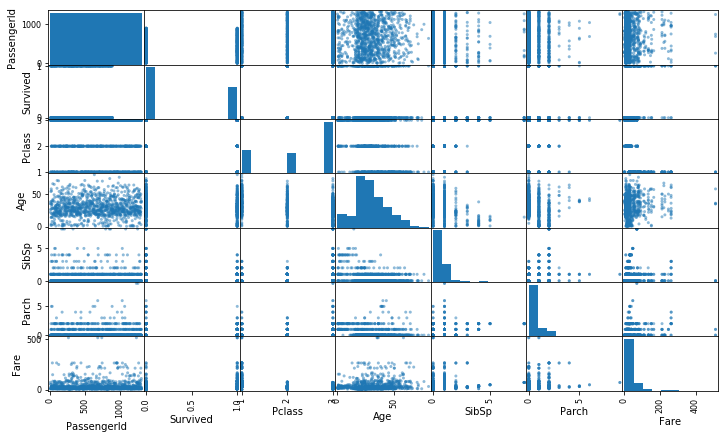

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic,figsize=(12,7))

# Fill the age columns
Now we are trying to fill the missing value of the Age column.

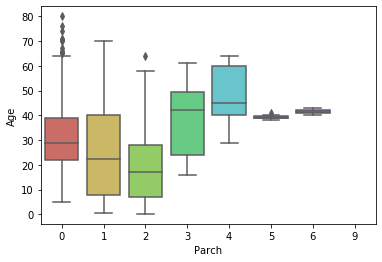

In [20]:
sn.boxplot(x='Parch',y='Age',data=titanic,palette ='hls')

Who have no parents & childrean have first 25% value in 5-22 limit.And upper 25% have value in 40-65 Range.

In [21]:
parch_group=titanic.groupby('Parch')
pd.DataFrame(parch_group)

,0,1
0,0,PassengerId Survived Pclass \ 0 ...
1,1,PassengerId Survived Pclass \ 7 ...
2,2,PassengerId Survived Pclass \ 8 ...
3,3,PassengerId Survived Pclass \ 86 ...
4,4,PassengerId Survived Pclass \ 167 ...
5,5,PassengerId Survived Pclass \ 13 ...
6,6,PassengerId Survived Pclass ...
7,9,PassengerId Survived Pclass ...


In [22]:
parch_group.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,655.903194,0.343658,2.311377,31.969401,0.243513,26.329820
1,666.905882,0.550847,2.158824,24.965625,1.029412,50.078358
2,618.814159,0.500000,2.300885,18.975979,1.902655,61.346275
3,739.500000,0.600000,2.125000,38.875000,0.875000,86.688537
4,586.833333,0.000000,2.333333,47.600000,0.666667,104.723617
5,540.333333,0.200000,3.000000,39.333333,0.666667,32.356250
6,855.000000,0.000000,3.000000,41.500000,1.000000,46.900000
9,1245.500000,NaN,3.000000,NaN,1.000000,69.550000


In [23]:
def age_aprox(cols):
    Age=cols[0]
    Parch=cols[0]
    if pd.isnull(Age):
        if Parch==0:
            return 32
        elif Parch==1:
            return 24
        elif Parch==2:
            return 17
        elif Parch==3:
            return 33
        elif Parch==4:
            return 45
        elif Parch==5:
            return 39
        elif Parch==6:
            return 43
        else:
            return 30
    else:
        return Age
    

In [24]:
titanic["Age"]=titanic[['Age','Parch']].apply(age_aprox,axis=1)
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [25]:
titanic["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [26]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.905019,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,12.883281,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
titanic=titanic[(titanic["Fare"]<33) &(titanic["Fare"]>0)]
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,984.000000,667.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,652.379065,0.323838,2.593496,28.580539,0.361789,0.276423,14.066365
std,378.381755,0.468290,0.637421,11.770579,0.767607,0.697921,7.761260
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,3.170800
25%,323.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.854200
50%,651.500000,0.000000,3.000000,30.000000,0.000000,0.000000,10.500000
75%,981.250000,1.000000,3.000000,32.000000,1.000000,0.000000,20.221875
max,1309.000000,1.000000,3.000000,80.000000,4.000000,5.000000,32.500000


In [28]:
titanic.shape

(984, 10)

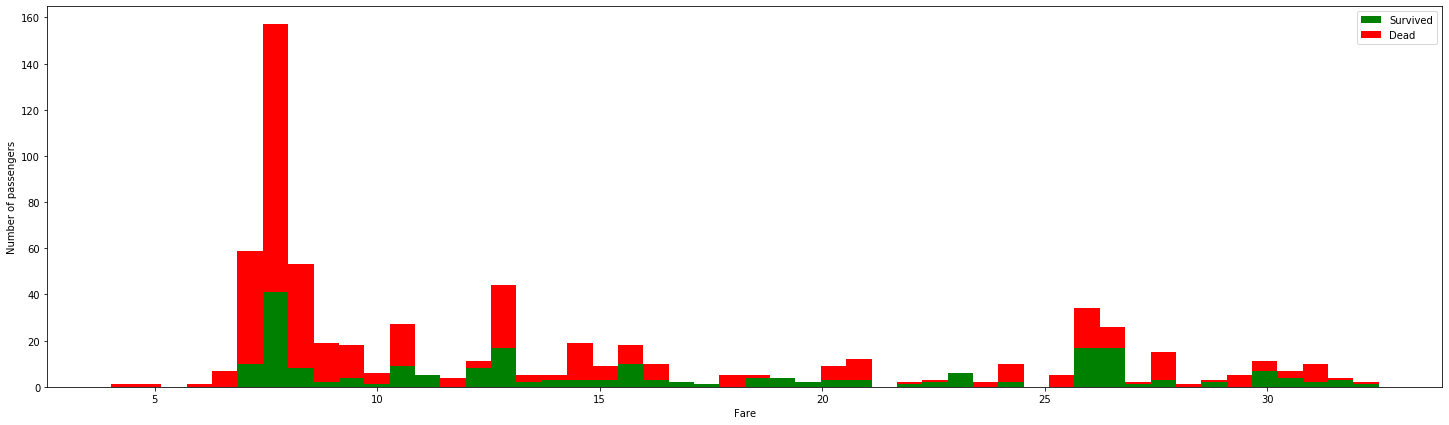

In [29]:
figure = plt.figure(figsize=(25, 7))
plt.hist([titanic[titanic['Survived'] == 1]['Fare'], titanic[titanic['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Passenger with lower fare most likely to be dead.
# Convert fare column

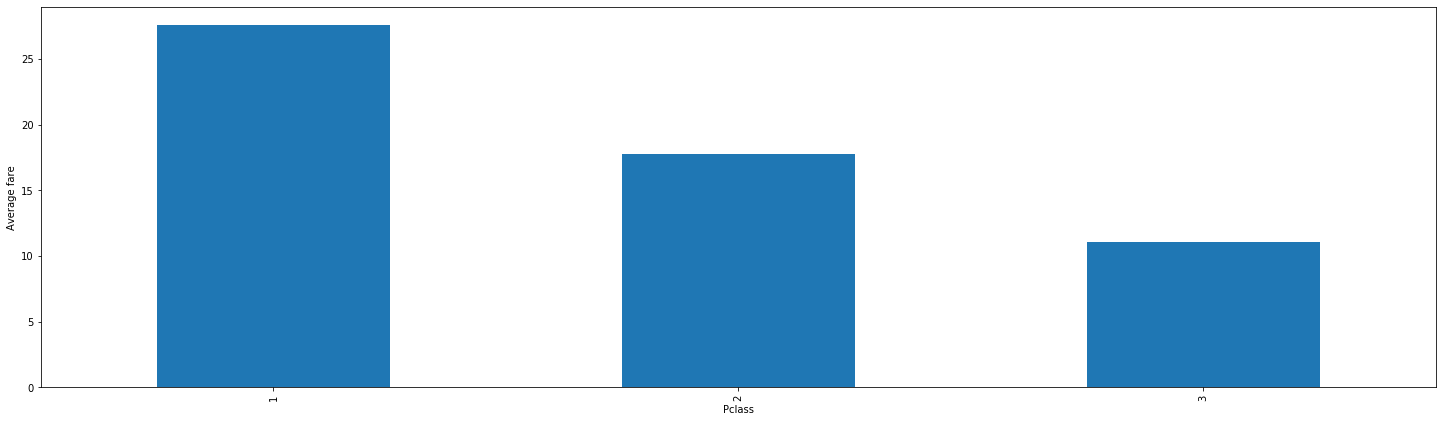

In [30]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
titanic.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

Now we were try to redefine the Fare column.

In [31]:
def fare_redefine(value):
    if 18<value<=33:
        return 'high'
    elif 11<value<=18:
        return 'medium'
    elif value<=11:
        return 'low'
titanic["Fare"]=titanic["Fare"].apply(fare_redefine)
titanic

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,low,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,low,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,low,S
5,6,0.0,3,"Moran, Mr. James",male,30.0,0,0,low,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,high,S
...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,low,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,low,S
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,low,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,low,S


Now we make one new column family.

In [32]:
titanic["Family_S"] = titanic["SibSp"] + titanic["Parch"] + 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


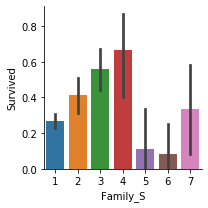

In [33]:
g = sn.factorplot(x="Family_S", y ="Survived", data=titanic, kind="bar", size=3)
plt.show()

In [34]:
titanic["Family_S"]

0      2
2      1
4      1
5      1
7      5
      ..
412    1
413    1
415    1
416    1
417    3
Name: Family_S, Length: 984, dtype: int64

We now try to create dummy columns from the family column.

In [35]:
titanic["Family_Size"] = [1 if ((i == 2) | (i == 3) | (i == 4)) else 0  for i in titanic["Family_S"]]
titanic = pd.get_dummies(titanic, columns=["Family_Size"])


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_S,Family_Size_0,Family_Size_1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,low,S,2,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,low,S,1,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,low,S,1,1,0
5,6,0.0,3,"Moran, Mr. James",male,30.0,0,0,low,Q,1,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,high,S,5,1,0


Refference link:

https://www.kaggle.com/hasanburakavci/my-titanic-project

## Analysis age columns deeply:

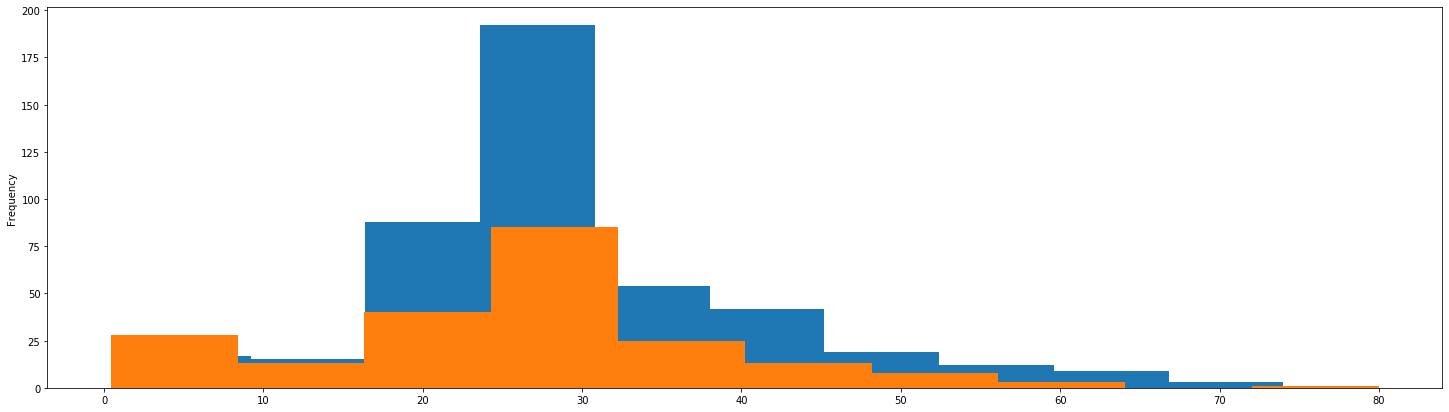

In [37]:
ax = plt.subplot()
ax.set_ylabel('Age')
titanic.groupby('Survived')['Age'].plot(kind='hist', figsize=(25, 7), ax = ax);

We can not get any clue from there.

In [38]:
titanic.isnull().sum()

PassengerId        0
Survived         317
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Family_S           0
Family_Size_0      0
Family_Size_1      0
dtype: int64

In [39]:
titanic.shape

(984, 13)

In [40]:
train=titanic[:(984-317)]
test=titanic[(984-317):]
train.shape
test.shape

(317, 13)

# Using labelencoder & onehotencoder 

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
gender_cat=titanic["Sex"]
gender_encoded=label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 1, 1, 1])

In [42]:
from pandas import DataFrame
gender_df=DataFrame(gender_encoded,columns=["Gender_label"])
gender_df.head()

,Gender_label
0,1
1,0
2,1
3,1
4,1


In [43]:
fare_cat=label_encoder.fit_transform(titanic["Fare"])
fare_cat

array([1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2,
       1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1,

In [44]:
fare_label=DataFrame(fare_cat,columns=["fare_cat"])
fare_label

,fare_cat
0,1
1,1
2,1
3,1
4,0
...,...
979,1
980,1
981,1
982,1


In [45]:
embarked_cat=label_encoder.fit_transform(titanic["Embarked"])
embarked_cat

array([2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [46]:
embarked_label=DataFrame(embarked_cat,columns=["embarked_label"])
embarked_label

,embarked_label
0,2
1,2
2,2
3,1
4,2
...,...
979,2
980,2
981,2
982,2


In [47]:
from sklearn.preprocessing import OneHotEncoder
objec=OneHotEncoder(sparse=False)
embarked_ohe=objec.fit_transform(embarked_label)
embarked_ohe_label=pd.DataFrame(embarked_ohe,columns=['C','Q','S'])
embarked_ohe_label.head()

,C,Q,S
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [48]:
fare_ohe=objec.fit_transform(fare_label)
fare_ohe_label=pd.DataFrame(fare_ohe,columns=['H','M','L'])
fare_ohe_label.head()

,H,M,L
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [49]:
titanic.drop(['Sex','Embarked','Fare'],inplace=True,axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Family_S,Family_Size_0,Family_Size_1
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,2,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,1,1,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,1,1,0
5,6,0.0,3,"Moran, Mr. James",30.0,0,0,1,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",28.0,0,0,1,1,0
413,1305,NaN,3,"Spector, Mr. Woolf",30.0,0,0,1,1,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,1,1,0
416,1308,NaN,3,"Ware, Mr. Frederick",30.0,0,0,1,1,0


# Together above dataframe

In [50]:
titanic['Gender_label']=gender_df["Gender_label"]

In [51]:
titanic['C']=embarked_ohe_label['C']

In [52]:
titanic['Q']=embarked_ohe_label['Q']

In [53]:
titanic['S']=embarked_ohe_label['S']

In [54]:
titanic['H']=fare_ohe_label['H']

In [55]:
titanic['M']=fare_ohe_label['M']

In [56]:
titanic['L']=fare_ohe_label['L']

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Family_S,Family_Size_0,Family_Size_1,Gender_label,C,Q,S,H,M,L
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,2,0,1,1,0.0,0.0,1.0,0.0,1.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,1,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,1,1,0,1,0.0,0.0,1.0,1.0,0.0,0.0
5,6,0.0,3,"Moran, Mr. James",30.0,0,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,5,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
titanic.shape

(984, 17)

In [59]:
train=titanic[:(984-317)]
test=titanic[(984-317):]


# Modeling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [61]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Name'],axis=1), train['Survived'], test_size=0.30, random_state=42)


In [62]:
X_train.shape

(466, 16)

In [63]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Train Accuracy: ", log_reg.score(X_train, y_train))
print("Test Accuracy: ", log_reg.score(X_test,y_test))

Train Accuracy:  1.0
Test Accuracy:  1.0


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
knn_classification = KNeighborsClassifier(n_neighbors=3)
knn_classification.fit(X_train, y_train)
print("Train Accuracy: ", knn_classification.score(X_train, y_train))
print("Test Accuracy: ", knn_classification.score(X_test,y_test))

Train Accuracy:  0.7832618025751072
Test Accuracy:  0.5671641791044776


In [65]:
clf=svm.SVC()
clf.fit(X_train,y_train)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test,y_test))

Train Accuracy:  0.6781115879828327
Test Accuracy:  0.6716417910447762


In [66]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Train Accuracy: ", rf_reg.score(X_train, y_train))
print("Test Accuracy: ", rf_reg.score(X_test,y_test))

Train Accuracy:  1.0
Test Accuracy:  1.0


## --------------End of the project---------------------------